In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

# Data preparation

In [3]:
df = pd.read_csv("alldata.csv")
df.head(100)

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"
...,...,...,...,...,...
95,Quantitative Finance Analyst,Bank of America,Job Description:\n\nWe are seeking a Quantitat...,21954.0,"Atlanta, GA 30308"
96,Advertiser Research Analyst,Cox Media Group,Description\n\nSummary: The Advertiser Researc...,221.0,"Atlanta, GA"
97,"Manager, Data Scientist (ML/NLP) -- Financial ...",KPMG,Innovate. Collaborate. Shine. Lighthouse — KPM...,4494.0,"Atlanta, GA 30338"
98,Data Science Instructor,General Assembly,"Since 2011, General Assembly has transformed t...",144.0,"Atlanta, GA"


# Clean data

In [4]:
df.isnull().sum()

position         11
company          11
description      11
reviews        1638
location         11
dtype: int64

In [7]:
review = df["reviews"]
df = df.drop(columns = ["reviews"])

In [8]:
df.drop(index = df[df["position"].isnull()].index, inplace=True)

In [9]:
df.isnull().any()

position       False
company        False
description    False
location       False
dtype: bool

In [10]:
#split city and stade columns
df['location'] = df.location.apply(lambda x: re.sub('\d*','',str(x)))
df['city'] = df.location.apply(lambda x: x.split(',')[0].strip())
df['state'] = df.location.apply(lambda x: x.split(',')[1].strip())
df['location'] = df['city']+ ', ' + df['state']
df.head()

,position,company,description,location,city,state
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,"Atlanta, GA",Atlanta,GA
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...","Atlanta, GA",Atlanta,GA
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...","Atlanta, GA",Atlanta,GA
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,"Atlanta, GA",Atlanta,GA
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,"Atlanta, GA",Atlanta,GA


# Data analysis

In [12]:
#Total number of company in dataset
total_number_company = df["company"].nunique()
print(total_number_company)

2213


In [23]:
#The company with the most hiring data scientist positions in dataset
most_hiring_company = df.groupby(["company"])["position"].count()
most_hiring_company = most_position.reset_index(name="position")
most_hiring_company = most_position.sort_values(["position"], ascending=False)
most_hiring_company = most_hiring_company.head(10)
print(most_position)

                                     company  position
122                               Amazon.com       358
230                           Ball Aerospace       187
1270                               Microsoft       137
866                                   Google       134
1328                      NYU Langone Health        77
798   Fred Hutchinson Cancer Research Center        70
1095                                    KPMG        66
1136                                  Lab126        50
748                                 Facebook        49
324                          Broad Institute        49


In [24]:
#create dataframe
most_hiring_company_df = pd.DataFrame(most_hiring_company)

Text(0.5, 1.0, 'Top 10 companyies have the most Data Scientist job Search')

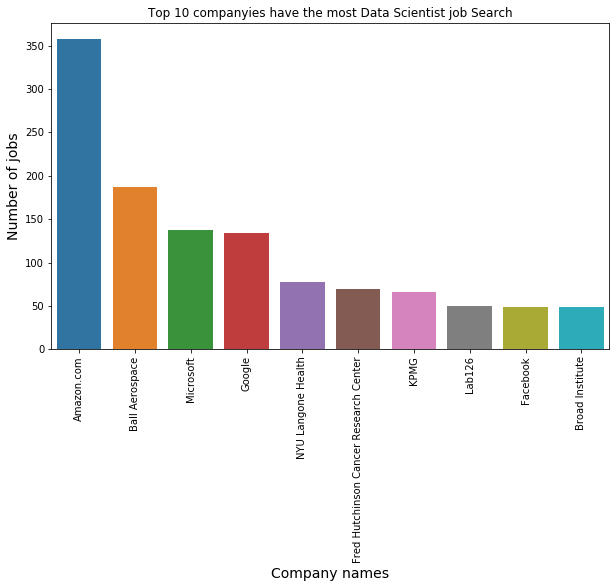

In [26]:
#plot dataframe
fig, ax = plt.subplots(figsize = (10,6))
ax = sns.barplot(x="company", y="position", data=most_hiring_company_df)
ax.set_xticklabels(most_hiring_company_df["company"], rotation = 90)
ax.set_xlabel("Company names",size = 14)
ax.set_ylabel("Number of jobs", size = 14)
ax.set_title("Top 10 companyies have the most Data Scientist job Search")


In [30]:
#The most hiring position
most_hiring_position = df.groupby(["position"])["company"].count()
most_hiring_position = most_hiring_position.reset_index(name="company")
most_hiring_position = most_hiring_position.sort_values(["company"], ascending=False)
most_hiring_position = most_hiring_position.head(10)
print(most_hiring_position)

                       position  company
1026             Data Scientist      351
3833      Senior Data Scientist       96
3115           Research Analyst       64
928               Data Engineer       60
2152  Machine Learning Engineer       56
2071        Lead Data Scientist       31
3276         Research Scientist       30
4685         Sr. Data Scientist       28
2660   Principal Data Scientist       24
879                Data Analyst       22


Text(0, 0.5, 'NUMBER of COMPANIES')

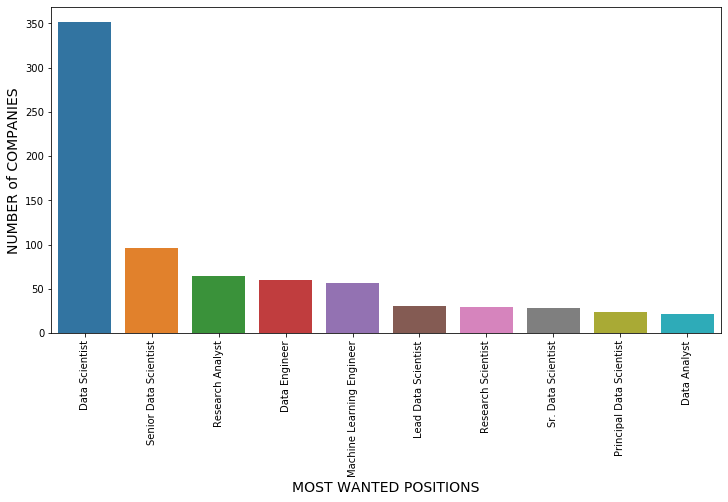

In [32]:
fig,ax = plt.subplots(figsize=(12,6))
ax = sns.barplot(x="position", y="company", data=most_hiring_position)
ax.set_xticklabels(most_hiring_position["position"], rotation= 90)
ax.set_xlabel("MOST WANTED POSITIONS", size = 14)
ax.set_ylabel("NUMBER of COMPANIES", size = 14)

In [45]:
#group position name into 5 group
data = df.copy()
data["position"] = [x.upper() for x in data["position"]]

data.loc[data.position.str.contains('SCIENTIST'), 'position'] = "Data Scientist"
data.loc[data.position.str.contains('PROGRAMMER'), 'position'] = "Machine learning Engineer"
data.loc[data.position.str.contains('ENGINEER'), 'postion'] = "Machine learning Engineer"
data.loc[data.position.str.contains('DEVELOPER'), 'positon'] = "Machine learning Engineer"
data.loc[data.position.str.contains('ANALYST'), 'position'] = "Data Analyst"
data.loc[data.position.str.contains('MANAGER'), 'position'] = "Data Science Manager"
data.loc[data.position.str.contains('CONSULTANT'), 'position'] = "Data Analyst"
data.loc[data.position.str.contains('DIRECTOR'), 'position'] = "Data Analyst"

data.position=data[(data.position == 'Data Scientist') | (data.position == 'Data Analyst') | (data.position == 'Machine learning Engineer') | (data.position == 'Data Science Manager')]
data.position=['Others' if x is np.nan else x for x in data.position]

                    position  company
2             Data Scientist     2645
4                     Others     2637
0               Data Analyst     1109
1       Data Science Manager      507
3  Machine learning Engineer       55


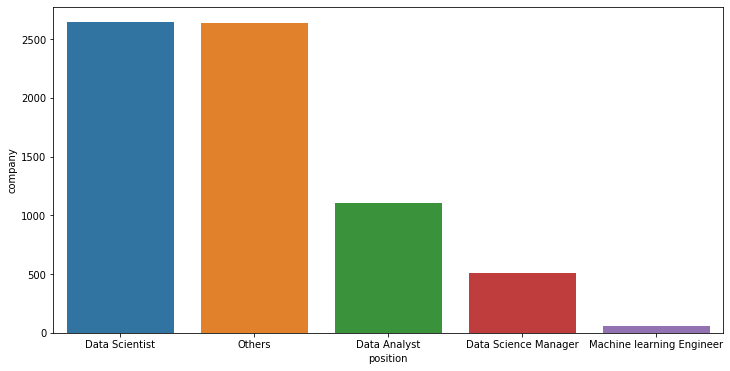

In [46]:
title = data.groupby(["position"])["company"].count()
title = title.reset_index(name = "company")
title = title.sort_values(["company"], ascending = False)
print(title)
fig,ax = plt.subplots(figsize =(12,6))
ax = sns.barplot(x = "position", y="company", data = title)

Text(0, 0.5, 'NUMBER OF HIRING POSITIONS')

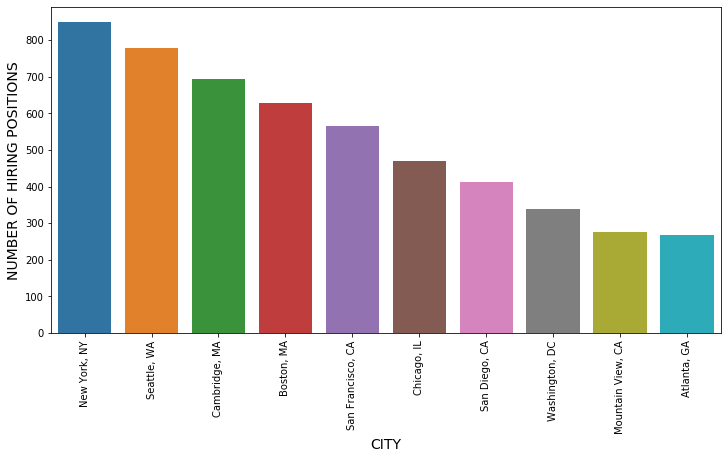

In [79]:
#Position by city
city = df.groupby(["location"]).count()
city = city.reset_index()
city = city.sort_values(["position"], ascending=False)
city = city.head(10)

fig,ax = plt.subplots(figsize = (12,6))
ax = sns.barplot(x = "location", y = "position", data = city)
ax.set_xticklabels(city["location"],rotation = 90)
ax.set_xlabel("CITY", size = 14)
ax.set_ylabel("NUMBER OF HIRING POSITIONS", size = 14)

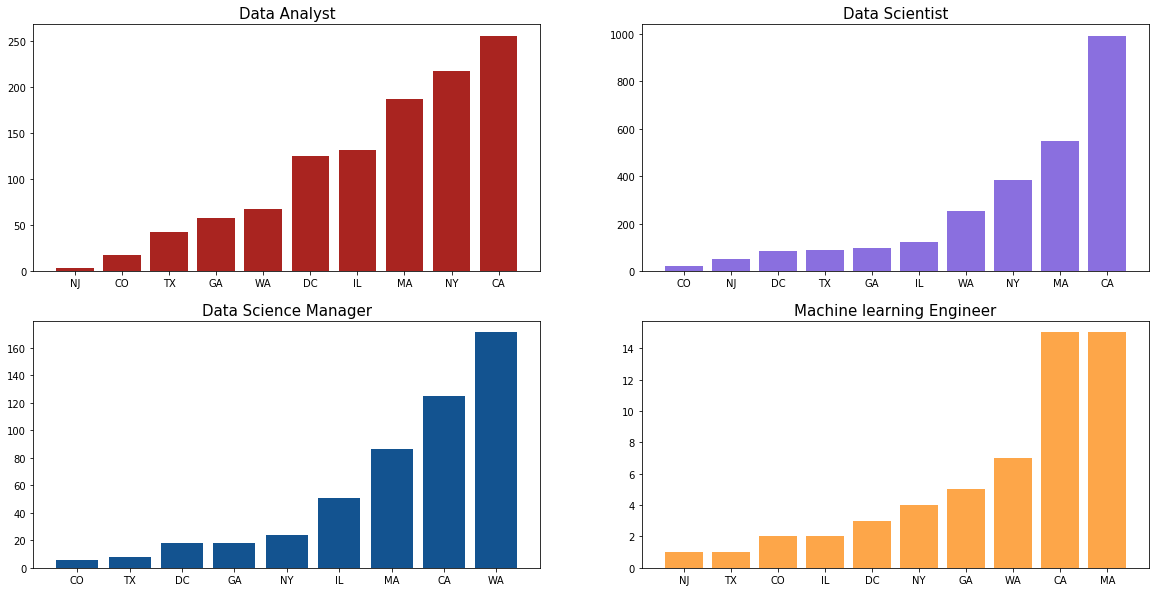

In [89]:
# Position by state and job title
data = data[data['position'] != 'Others']
i = 1
color = ['#A92420','#8A6FDF','#135390','#FDA649']
fig = plt.figure(figsize=(20,10))
for position in data.position.unique():
    x = data[data['position']== str(position)].groupby(['state']).count().sort_values('company')
    plt.subplot(2, 2, i)
    i += 1
    plt.bar(x.index,x['company'], color = color[i-2])
    plt.xlabel('')
    plt.xticks(size = 10)
    plt.title(str(position), size = 15)
plt.show()